In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import pickle

import networkx as nx

In [2]:
import gm.match as gmatch
import gm.node as gnode
import gm.plot as gplot
import gm.stat as gstat

In [3]:
plt.rcParams.update({'font.size': 18})
figpath = './../figures/wiki/'

## Read data

In [5]:
G = pickle.load(open( "../data/wiki_talk_zh/wiki_2004.p", "rb" ) )

node overlapping

In [12]:
G[1].nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90))

[91, 198, 471, 316, 440, 185, 227, 225, 227, 338, 288, 484] 290.8333333333333
[114, 251, 598, 406, 600, 235, 276, 314, 308, 442, 374, 651] 380.75


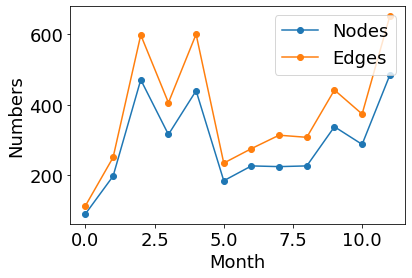

In [5]:
nnd = []
for i in range(12):
    nnd.append(G[i+1].number_of_nodes())
    
nedge = []
for i in range(12):
    nedge.append(G[i+1].number_of_edges())

plt.plot(nnd,'o-',label='Nodes')
plt.plot(nedge,'o-',label='Edges')
plt.xlabel('Month')
plt.ylabel('Numbers')
plt.legend()

print(nnd,np.mean(nnd))
print(nedge,np.mean(nedge))

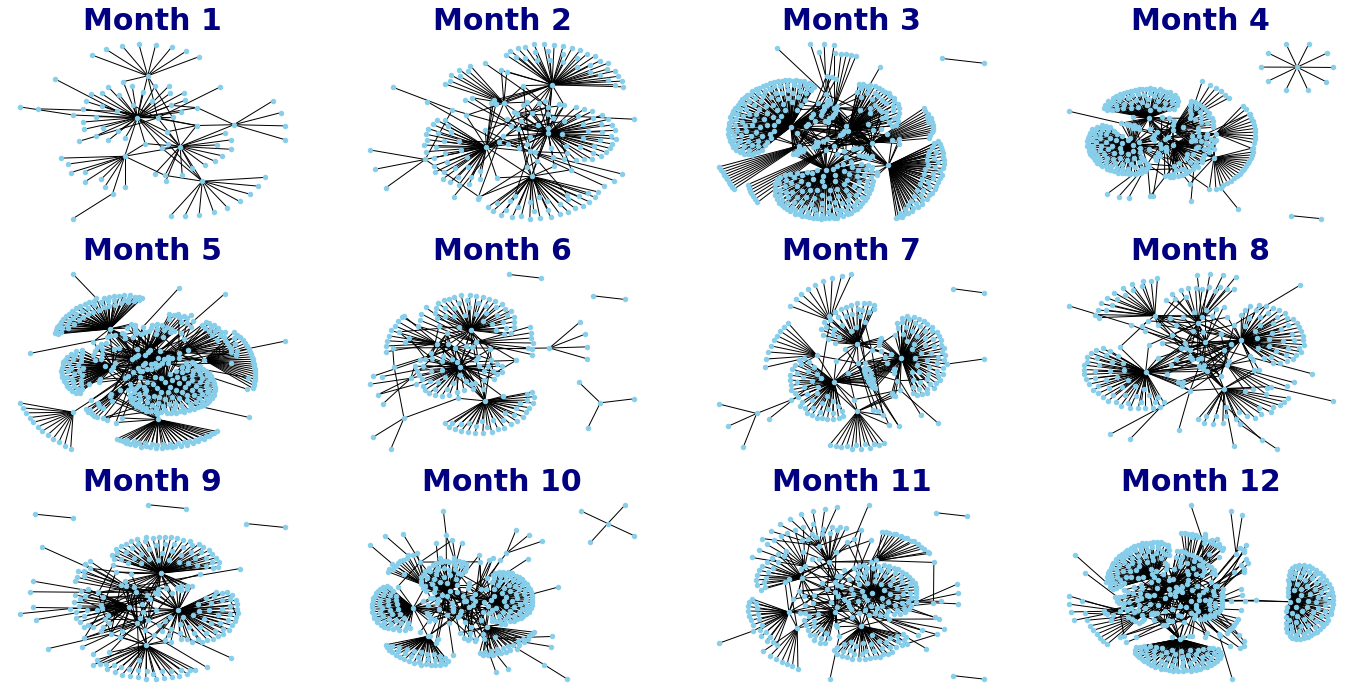

In [5]:
options={
    "node_size":20,
}
plt.figure(figsize=(6*4,4*3))
for i in range(12):
    plt.subplot(3,4,i+1)
    gplot.draw_weighted(G[i+1],title='Month {}'.format(i+1),label_name=False,**options)
plt.savefig('./../figures/wiki/samples_2004.eps')

## Mean

In [7]:
GL = list(G.values()).copy()

In [5]:
# muG, Gp, E, mu_list, P = gstat.iterative_mean_graph_ext_nx(GL,max_itr=3, algo='faq')
# np.save('./res/wiki/wiki_2004_month_iter3.npy',[muG,Gp,E,mu_list,P])

muG, Gp, E, mu_list, P = np.load('./res/wiki/wiki_2004_month_iter3.npy',allow_pickle=True)

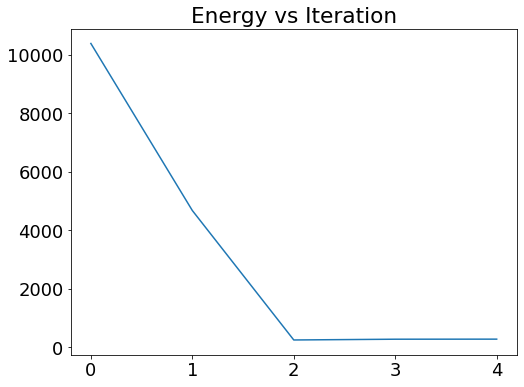

In [7]:
plt.figure(figsize=(8,6))
plt.plot(E)
plt.title('Energy vs Iteration')
plt.savefig('./../figures/wiki/energy_iteration.eps')

In [10]:
## adjacency mean

muG0 = gstat.original_mean(GL)

In [19]:
thr = 0.5 # to remove some week edges
wd = 1

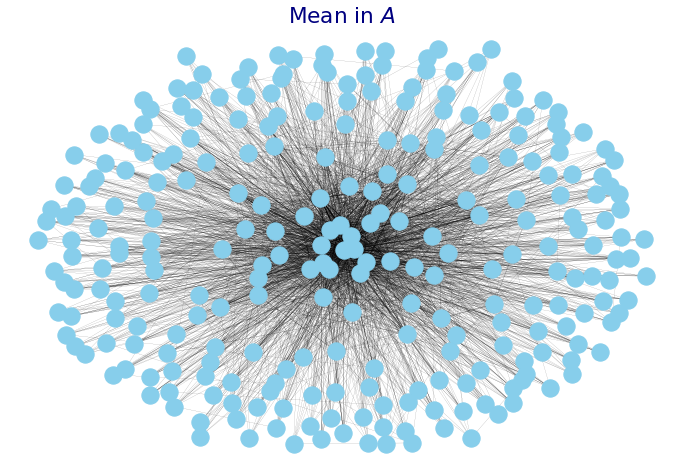

In [20]:
plt.figure(figsize=(12,8))
gplot.draw_weighted(gplot.remove_weak_nodes(muG0,thr=thr),width_factor=wd,label_name=False)
plt.title('Mean in $A$')
plt.savefig(figpath+'originMean.png')

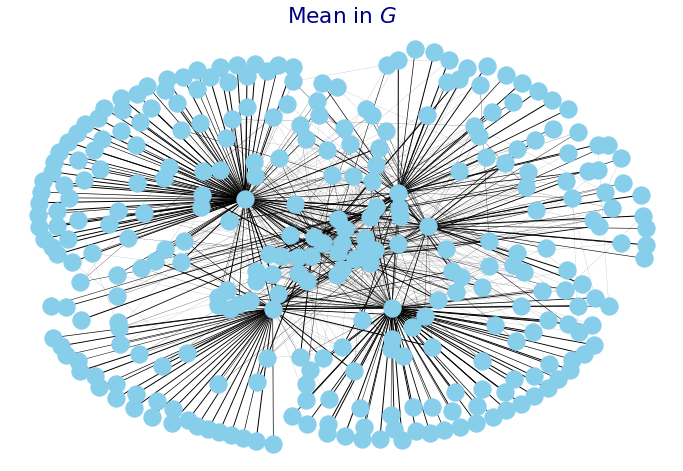

In [21]:
plt.figure(figsize=(12,8))
pos = gplot.draw_weighted(gplot.remove_weak_nodes(muG,thr=thr),width_factor=wd,return_pos=True,label_name=False)
plt.title('Mean in $G$')

plt.savefig(figpath+'quotientMean.png')

## PCA

In [22]:
pca,scores,V = gstat.pcaG_aligned_edge(Gp)

pc_sd = np.sqrt(pca.explained_variance_)

scores_vec1d = np.arange(-2,2.01,1)
pc_nGraphs = scores_vec1d.size

pc1_scores = np.zeros((pc_nGraphs,1))
pc1_scores[:,0] = scores_vec1d*pc_sd[0]
pc1_graphs = gstat.pca_scores_to_graphs_structure(pca,pc1_scores)

pc2_scores = np.zeros((pc_nGraphs,2))
pc2_scores[:,1] = scores_vec1d*pc_sd[1]
pc2_graphs = gstat.pca_scores_to_graphs_structure(pca,pc2_scores)

pc3_scores = np.zeros((pc_nGraphs,3))
pc3_scores[:,2] = scores_vec1d*pc_sd[2]
pc3_graphs = gstat.pca_scores_to_graphs_structure(pca,pc3_scores)

nodes number are:  [484, 484, 484, 484, 484, 484, 484, 484, 484, 484, 484, 484]


In [23]:
# plt.figure('PC Cumulative Variance Proportion')
# plt.plot(np.cumsum([0]+list(pca.explained_variance_ratio_)),label='Quotient Space')
# pca0,scores0,V0 = gstat.pcaG_aligned_edge(GL)
# plt.plot(np.cumsum([0]+list(pca0.explained_variance_ratio_)),label='Original Space')
# plt.xlabel('Number of Principal Components',fontsize=12)
# plt.ylabel('Explained Variation',fontsize=12)
# plt.legend()
# # #plt.savefig(figspath+'pca_cumvar.eps')

In [24]:
pos1 = gplot.fill_pos(pos,max([G.number_of_nodes() for G in Gp]))

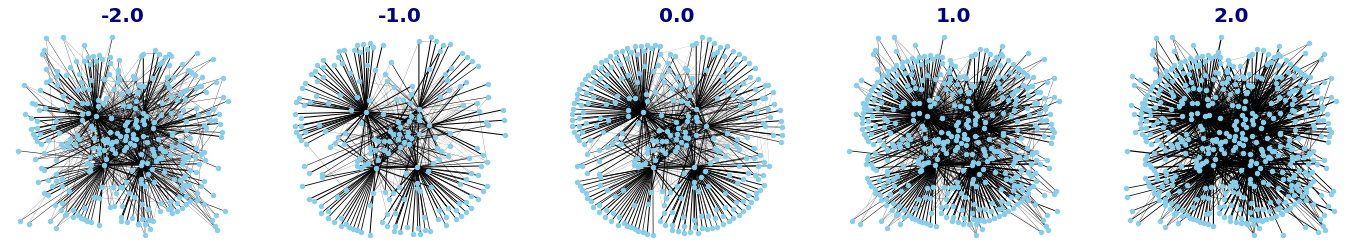

In [26]:
### sequence of pc1
plt.figure('PC1',figsize=(24,4))
for k in range(pc_nGraphs):
    plt.subplot(1,pc_nGraphs,k+1)
    gplot.draw_weighted(gplot.remove_weak_nodes(pc1_graphs[k],thr),pos=pos1,
                     title=str(scores_vec1d[k]),width_factor=wd,label_name=False,**options)
plt.savefig(figpath+'pca1.png')

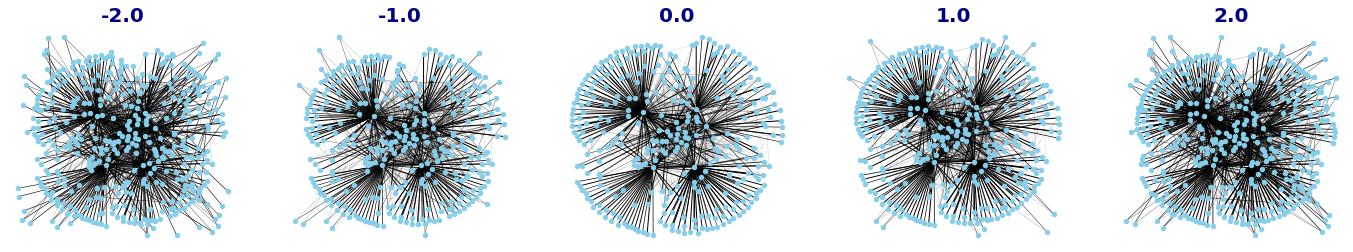

In [27]:
### sequence of pc2
plt.figure('PC2',figsize=(24,4))
for k in range(pc_nGraphs):
    plt.subplot(1,pc_nGraphs,k+1)
    gplot.draw_weighted(gplot.remove_weak_nodes(pc2_graphs[k],thr),
                     pos=pos1,
                     title=str(scores_vec1d[k]),width_factor=wd,label_name=False,**options)
plt.savefig(figpath+'pca2.png')

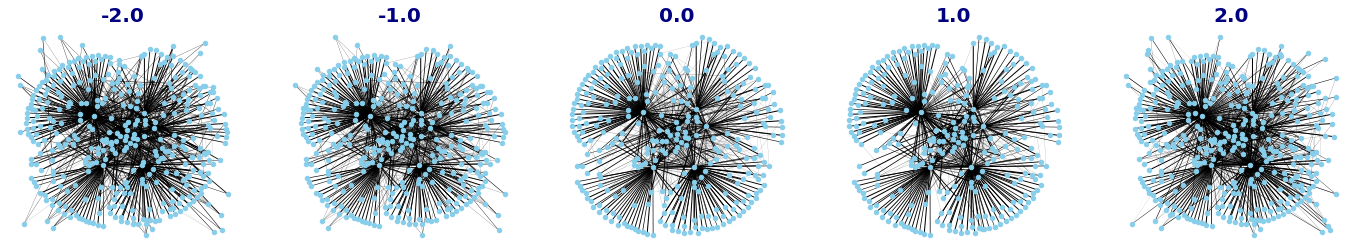

In [28]:
### sequence of pc3
plt.figure('PC3',figsize=(24,4))
for k in range(pc_nGraphs):
    plt.subplot(1,pc_nGraphs,k+1)
    gplot.draw_weighted(gplot.remove_weak_nodes(pc3_graphs[k],thr),
                     pos=pos1,
                     title=str(scores_vec1d[k]),width_factor=wd,label_name=False,**options)
plt.savefig(figpath+'pca3.png')